In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**see final model it is the best one of augment3 and augment 5**

In [ ]:
import os
import numpy as np
import cv2  # OpenCV for image processing
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to load chromogram images from a directory
def load_chromograms(data_dir, img_size):
    images = []
    labels = []

    # Iterate through each class folder
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)  # Resize to the specified size
                    images.append(img)
                    labels.append(int(label))  # Assuming labels are class folder names

    return np.array(images), np.array(labels)

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size
X, y = load_chromograms(data_dir, img_size)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = len(np.unique(y))  # Number of unique labels

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 202ms/step - accuracy: 0.4608 - loss: 1.4367 - val_accuracy: 0.6502 - val_loss: 0.9478
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.6805 - loss: 0.9137 - val_accuracy: 0.7368 - val_loss: 0.8291
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.7185 - loss: 0.7699 - val_accuracy: 0.7523 - val_loss: 0.6969
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0.7689 - loss: 0.6755 - val_accuracy: 0.8101 - val_loss: 0.6119
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - accuracy: 0.8213 - loss: 0.5303 - val_accuracy: 0.8142 - val_loss: 0.5604
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.8524 - loss: 0.4362 - val_accuracy: 0.8256 - val_loss: 0.5103
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.8697 - loss: 0.3578 - val_accuracy: 0.8411 - val_loss: 0.4632
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 195ms/step - accuracy: 0.8992 - loss: 0

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_pred_prob = model.predict(X_val)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Generate the classification report
report = classification_report(y_val, y_pred, target_names=[str(i) for i in range(num_classes)])
print(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        93
           1       0.87      0.92      0.89       253
           2       0.91      0.91      0.91       303
           3       0.88      0.81      0.84        96
           4       0.88      0.88      0.88       224

    accuracy                           0.89       969
   macro avg       0.88      0.87      0.87       969
weighted avg       0.89      0.89      0.89       969



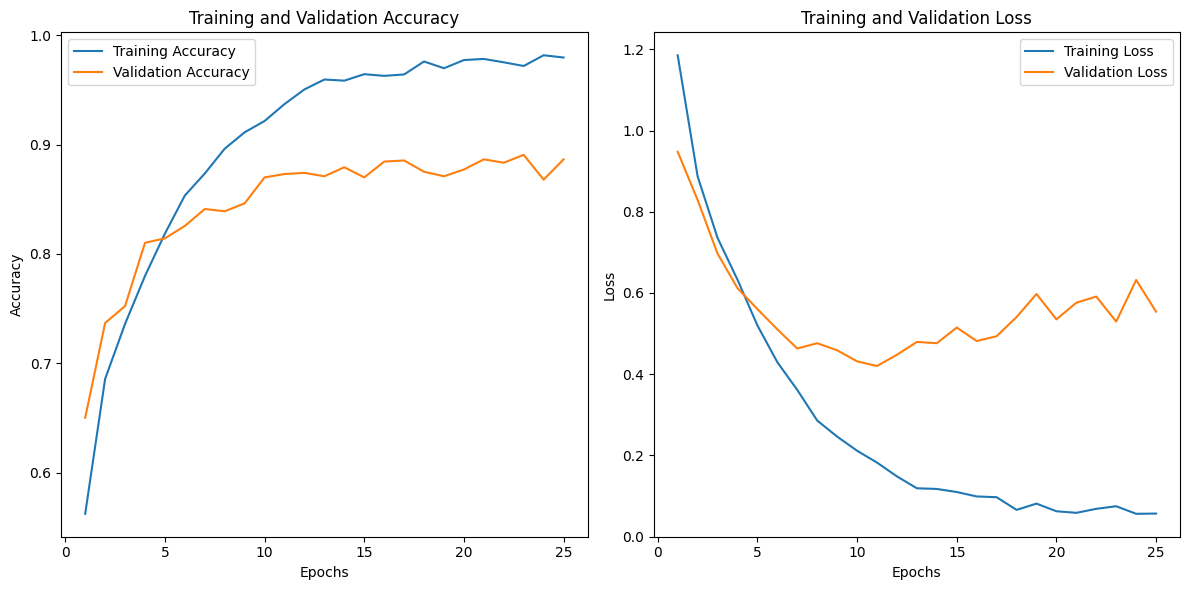

In [ ]:
import matplotlib.pyplot as plt
 #Extract the accuracy and loss values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/5augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2.h5')

Found 7266 files belonging to 5 classes.
Using 5813 files for training.
Found 7266 files belonging to 5 classes.
Using 1453 files for validation.
Epoch 1/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.5030 - loss: 1.3689 - val_accuracy: 0.7061 - val_loss: 0.8095
Epoch 2/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.6877 - loss: 0.8715 - val_accuracy: 0.7674 - val_loss: 0.6438
Epoch 3/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 159ms/step - accuracy: 0.7632 - loss: 0.6665 - val_accuracy: 0.8341 - val_loss: 0.4678
Epoch 4/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.8241 - loss: 0.5069 - val_accuracy: 0.8713 - val_loss: 0.3514
Epoch 5/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.8649 - loss: 0.3816 - val_accuracy: 0.8906 - val_loss: 0.3027
Epoch 6/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.8857 - loss: 0.3136 - val_accuracy: 0.9030 - val_loss: 0.2854
Epoch 7/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 157ms/step - accuracy: 0.9

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_pred_prob = model.predict(X_val)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Generate the classification report
report = classification_report(y_val, y_pred, target_names=[str(i) for i in range(num_classes)])
print(report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
              precision    recall  f1-score   support

           0       0.30      0.67      0.42        93
           1       0.71      0.72      0.71       253
           2       0.80      0.62      0.70       303
           3       0.36      0.45      0.40        96
           4       0.74      0.51      0.60       224

    accuracy                           0.61       969
   macro avg       0.58      0.59      0.57       969
weighted avg       0.67      0.61      0.62       969



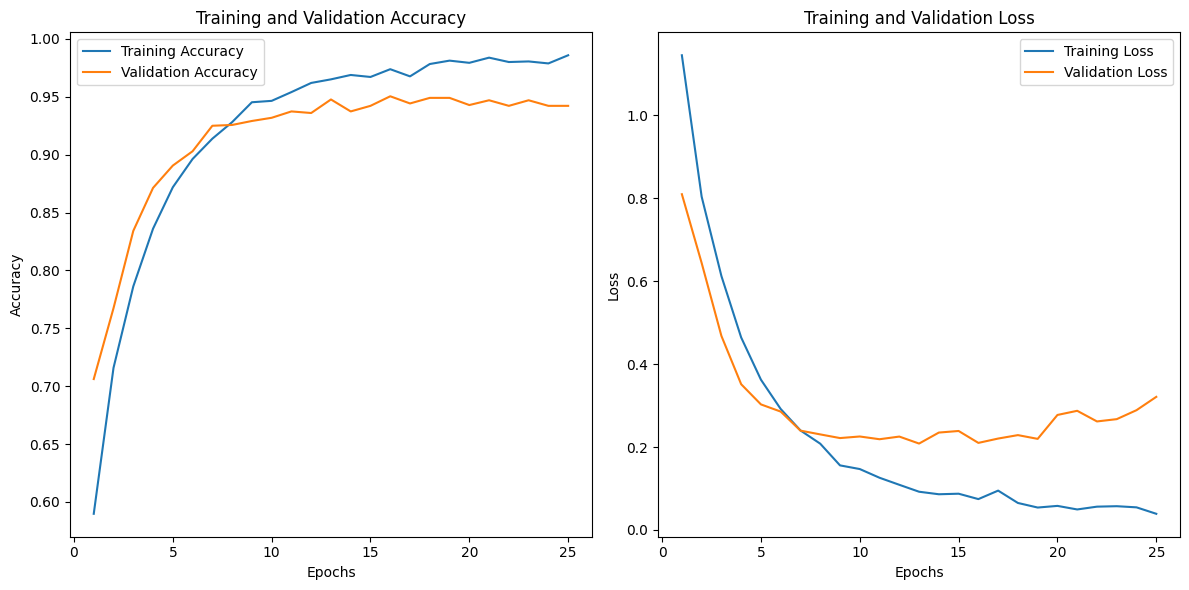

In [ ]:
import matplotlib.pyplot as plt
 #Extract the accuracy and loss values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/5augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2','3','4']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2(10).h5')

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Found 7266 files belonging to 5 classes.
Using 5813 files for training.
Found 7266 files belonging to 5 classes.
Using 1453 files for validation.
Epoch 1/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 171ms/step - accuracy: 0.5253 - loss: 1.2426 - val_accuracy: 0.7082 - val_loss: 0.7904
Epoch 2/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.7127 - loss: 0.8150 - val_accuracy: 0.8039 - val_loss: 0.6400
Epoch 3/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.7890 - loss: 0.6382 - val_accuracy: 0.8376 - val_loss: 0.4714
Epoch 4/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 154ms/step - accuracy: 0.8368 - loss: 0.4854 - val_accuracy: 0.8727 - val_loss: 0.3662
Epoch 5/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.8700 - loss: 0.3712 - val_accuracy: 0.8975 - val_loss: 0.3012
Epoch 6/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.8984 - loss: 0.2988 - val_accuracy: 0.9202 - val_loss: 0.2441
Epoch 7/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

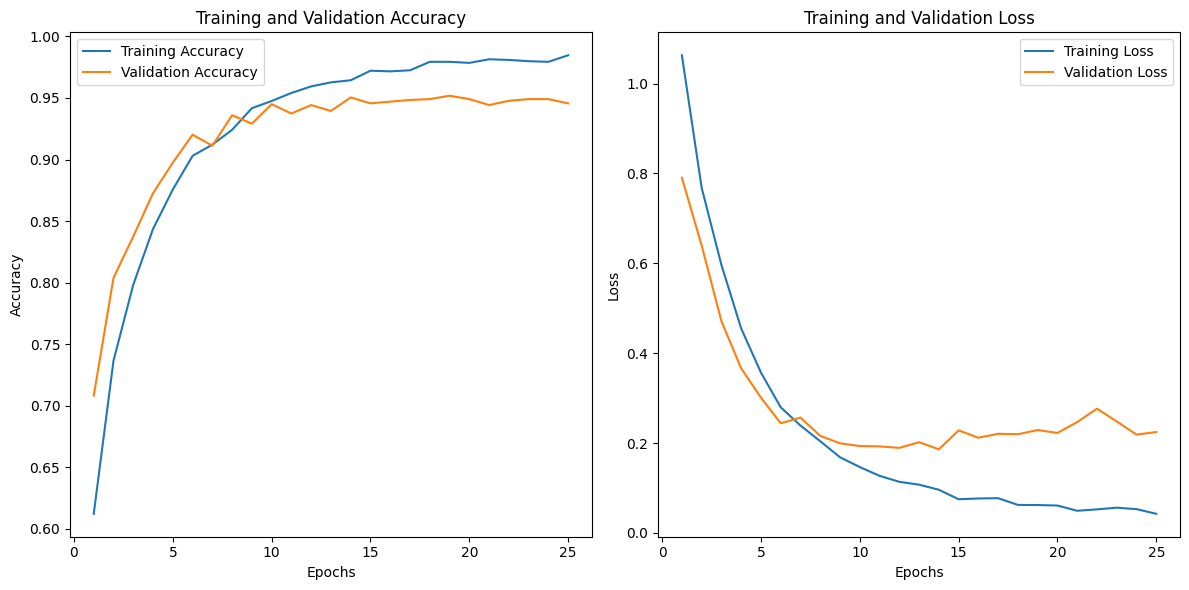

In [ ]:
import matplotlib.pyplot as plt
 #Extract the accuracy and loss values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2','3','4']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2(11).h5')

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Found 4844 files belonging to 5 classes.
Using 3876 files for training.
Found 4844 files belonging to 5 classes.
Using 968 files for validation.
Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.4393 - loss: 1.5712 - val_accuracy: 0.6849 - val_loss: 0.8629
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.6692 - loss: 0.9403 - val_accuracy: 0.7118 - val_loss: 0.7352
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 150ms/step - accuracy: 0.7147 - loss: 0.8104 - val_accuracy: 0.8347 - val_loss: 0.5932
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.7727 - loss: 0.6718 - val_accuracy: 0.8471 - val_loss: 0.5025
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.7882 - loss: 0.6107 - val_accuracy: 0.8368 - val_loss: 0.4961
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8280 - loss: 0.5074 - val_accuracy: 0.8729 - val_loss: 0.4230
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

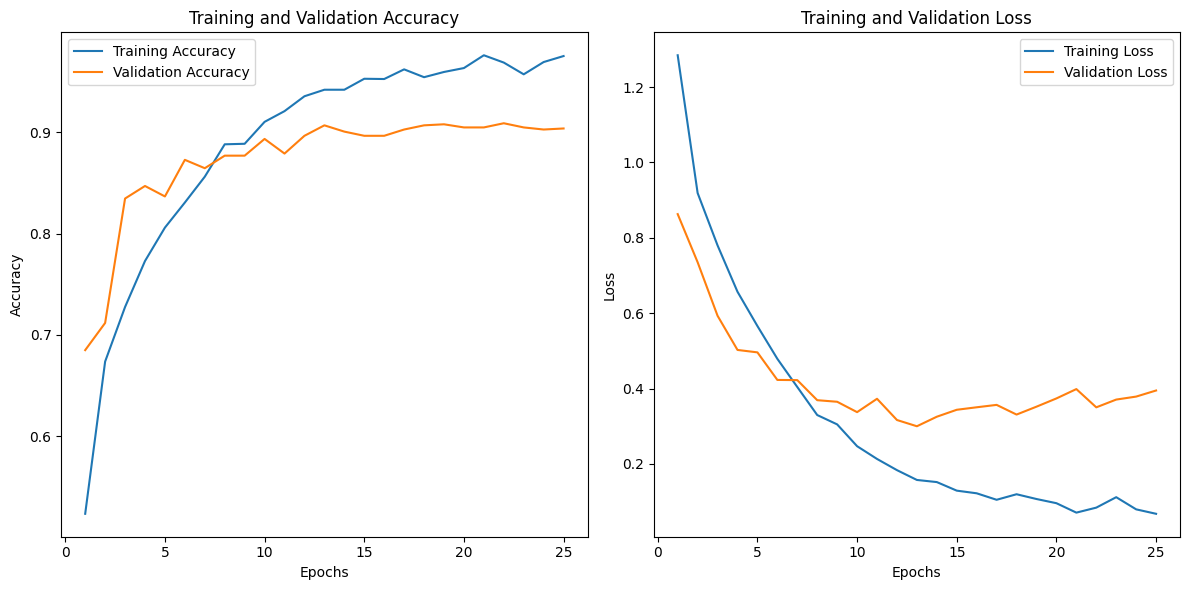

In [ ]:
import matplotlib.pyplot as plt
 #Extract the accuracy and loss values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()